### **Ejercicio N°4**

Teniendo en cuenta la variable `altura_m` que se encuentra en el dataset `pacientes.csv` trabajado en el **Ejercicio N°2**, genere una tabla de frecuencias en la que las observaciones se encuentren segmentadas en subintervalos de 10 cm de amplitud que estén “cerrados por izquierda”, es decir, que tengan la forma **[extremo_inferior, extremo_superior)**.

La tabla de frecuencias generada deberá contener columnas en las que se especifiquen las frecuencias absolutas, relativas y relativas acumuladas correspondientes a cada subintervalo.
¿Qué porcentaje de las personas del dataset tienen una altura **menor a 1.8 m**?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pacientes = pd.read_csv("/content/pacientes.csv")
pacientes.head(1)

,codigo_paciente;peso_inicial_kg;peso_final_kg;altura_m;sexo;tiempo_tratamiento_dias
398911;78;72;1,8;F;583


In [3]:
pacientes = pd.read_csv("/content/pacientes.csv", sep=";", encoding="latin1")
pacientes.head(1)

,codigo_paciente,peso_inicial_kg,peso_final_kg,altura_m,sexo,tiempo_tratamiento_dias
0,398911,78,72,"1,8",F,583


In [4]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   codigo_paciente          50 non-null     int64 
 1   peso_inicial_kg          50 non-null     int64 
 2   peso_final_kg            50 non-null     int64 
 3   altura_m                 50 non-null     object
 4   sexo                     50 non-null     object
 5   tiempo_tratamiento_dias  50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [5]:
pacientes["altura_m"] = pacientes["altura_m"].astype(str).str.replace(",",".").astype("float")

In [6]:
pacientes["altura_m"].dtype

dtype('float64')

In [7]:
print(pacientes["altura_m"].min(), pacientes["altura_m"].max())

1.5 1.9


In [8]:
bins = pd.interval_range(start=1.5, end=1.9, freq=0.1, closed='left')
pacientes["altura_intervalo"] = pd.cut(pacientes["altura_m"], bins=bins)

In [9]:
frecuencia_abs = pacientes["altura_intervalo"].value_counts(sort=False)

frecuencia_rel = frecuencia_abs / len(pacientes)

frecuencia_acum = frecuencia_rel.cumsum()

In [10]:
tabla_de_frecuencias = pd.DataFrame({
    "Frecuencia Absoluta" : frecuencia_abs,
    "Frecuencia Relativa" : frecuencia_rel,
    "Frecuencia Acumulada" : frecuencia_acum
})
tabla_de_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
altura_intervalo,,,
"[1.5, 1.6)",12,0.24,0.24
"[1.6, 1.7000000000000002)",20,0.40,0.64
"[1.7000000000000002, 1.8000000000000003)",11,0.22,0.86
"[1.8000000000000003, 1.9000000000000004)",7,0.14,1.00


In [11]:
tabla_de_frecuencias.index = tabla_de_frecuencias.index.map(
    lambda x: f"[{x.left:.1f}, {x.right:.1f})"
)
tabla_de_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
altura_intervalo,,,
"[1.5, 1.6)",12,0.24,0.24
"[1.6, 1.7)",20,0.40,0.64
"[1.7, 1.8)",11,0.22,0.86
"[1.8, 1.9)",7,0.14,1.00


Viendo la tabla generada podemos concluir que el 86% de las personas mida menos a 1.8

In [15]:
pacientes["altura_intervalo"] = pacientes["altura_intervalo"].index.map(
    lambda x: f"[{x.left:.1f}, {x.right:.1f})"
)

AttributeError: 'int' object has no attribute 'left'

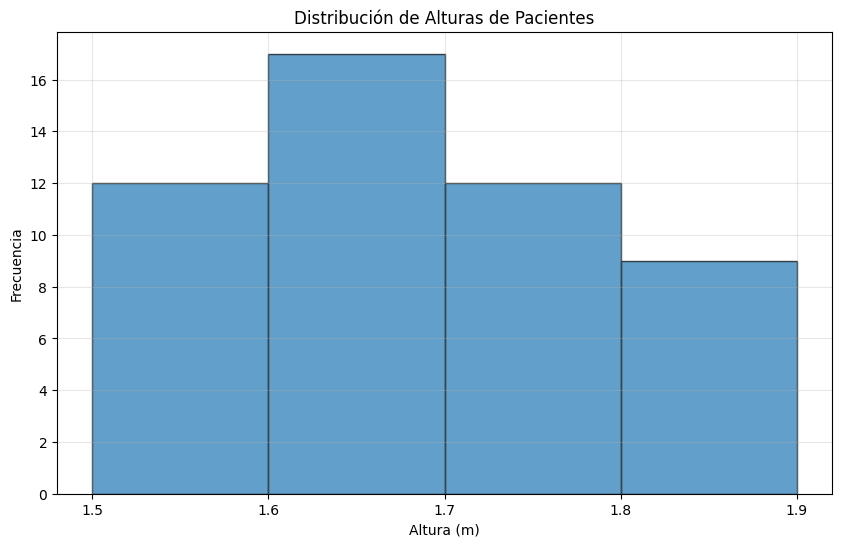

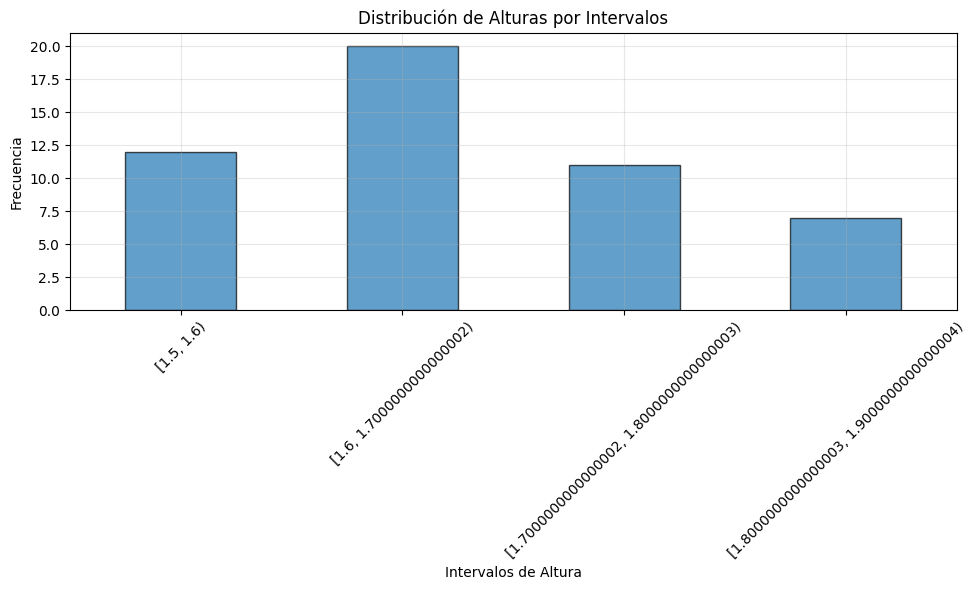

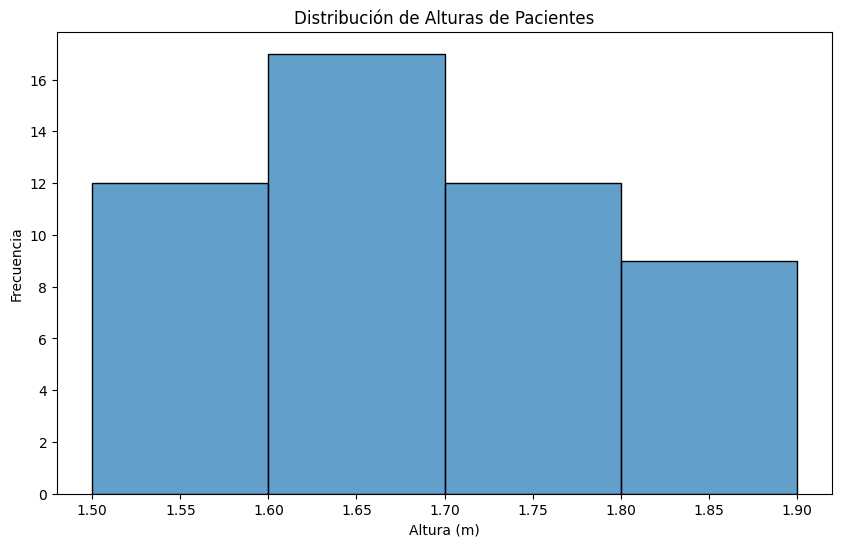

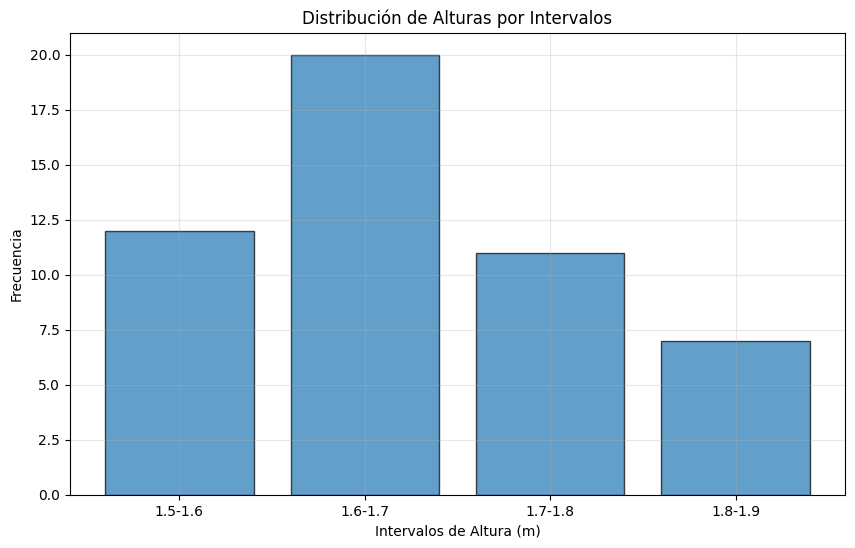

Distribución por intervalos:
altura_intervalo
[1.5, 1.6)                                  12
[1.6, 1.7000000000000002)                   20
[1.7000000000000002, 1.8000000000000003)    11
[1.8000000000000003, 1.9000000000000004)     7
Name: count, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tus intervalos ya definidos
bins = pd.interval_range(start=1.5, end=1.9, freq=0.1, closed='left')
pacientes["altura_intervalo"] = pd.cut(pacientes["altura_m"], bins=bins)

# Opción 1: Histograma básico con matplotlib
plt.figure(figsize=(10, 6))
plt.hist(pacientes["altura_m"], bins=[1.5, 1.6, 1.7, 1.8, 1.9],
         edgecolor='black', alpha=0.7)
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alturas de Pacientes')
plt.xticks([1.5, 1.6, 1.7, 1.8, 1.9])
plt.grid(True, alpha=0.3)
plt.show()

# Opción 2: Usando value_counts() de los intervalos
plt.figure(figsize=(10, 6))
conteos = pacientes["altura_intervalo"].value_counts().sort_index()
conteos.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Intervalos de Altura')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alturas por Intervalos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Opción 3: Con seaborn (más estilizado)
plt.figure(figsize=(10, 6))
sns.histplot(data=pacientes, x="altura_m", bins=[1.5, 1.6, 1.7, 1.8, 1.9],
             edgecolor='black', alpha=0.7)
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alturas de Pacientes')
plt.show()

# Opción 4: Gráfico de barras con etiquetas personalizadas
plt.figure(figsize=(10, 6))
conteos = pacientes["altura_intervalo"].value_counts().sort_index()
etiquetas = ['1.5-1.6', '1.6-1.7', '1.7-1.8', '1.8-1.9']
plt.bar(range(len(conteos)), conteos.values, edgecolor='black', alpha=0.7)
plt.xlabel('Intervalos de Altura (m)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alturas por Intervalos')
plt.xticks(range(len(conteos)), etiquetas)
plt.grid(True, alpha=0.3)
plt.show()

# Para ver los conteos por intervalo
print("Distribución por intervalos:")
print(pacientes["altura_intervalo"].value_counts().sort_index())